- AdaGrad
- RMSprop
- Adam

class added with those also.

model : single-sigmoid-neruon model ; 1D(scalar) input - 1D ouput.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.colors

from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
from single_sigmoid_neuron import SingleSigmoidNeuron

In [10]:
# experiment configuration

# data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])

# learning algo
algo = 'Adam'
# GD, MiniBatch, Momentum, NAG
# AdaGrad, RMSProp, Adam 


# initialisation
w_init = -6
b_init = 4.0

# other hyperparameters
epochs = 200
gamma = 0.9
eta = 0.5
eps = 1e-8



# stuff for plotting
w_min = -7
w_max = 5

b_min = -7
b_max = 5

total_frames = 20

In [5]:
# model
ssn = SingleSigmoidNeuron(w_init, b_init, algo) #instantiate with ini value, algo
ssn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma)

## Visualization

### 1) plot weight, bias, loss vs steps

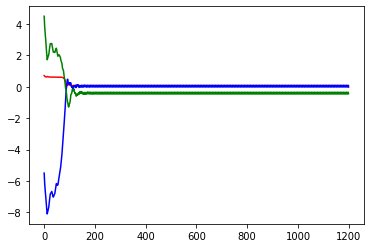

In [21]:
plt.plot(ssn.E_h, 'r')
plt.plot(ssn.W_h, 'b')
plt.plot(ssn.B_h, 'g')

plt.show()

### 2) loss function(3D surface + contour) + parameters-changing(animate)

/tmp/ipykernel_43474/3362493080.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax_3d = fig_3d.gca(projection="3d")  # axis handle


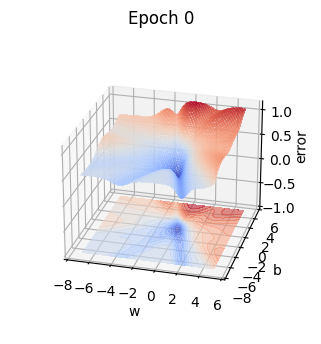

In [7]:
# first, plot the loss "function" - 3D surface; also contour

# meshgrid
Wax = np.linspace(w_min, w_max, 256)
Bax = np.linspace(b_min, b_max, 256)
WW_grid, BB_grid = np.meshgrid(Wax, Bax)

# the parameters - we are specifying - not object(self) parameters
# for plotting
# that is why that option in the function.
# loss value to all the parameter-grid-coord-values (to plot)
Z2 = ssn.error(X, Y, WW_grid, BB_grid) 

# figure, axis handlers for the 3D plot
fig_3d = plt.figure(dpi=100)  # dots per inch. - more=>better quality, but more time
ax_3d = fig_3d.gca(projection="3d")  # axis handle


# SURFACE PLOT
surf = ax_3d.plot_surface(
    WW_grid, BB_grid, Z2,
    rstride=3, cstride=3, #row_stride, col_stride
    alpha=0.5, cmap=cm.coolwarm,
    linewidth=0, antialiased=False,
)


# CONTOUR PLOT
# in z=-1 plane (in the same 3d plot fig itself)    
cset = ax_3d.contourf(WW_grid, BB_grid, Z2, 25, zdir="z", offset=-1, alpha=0.6, cmap=cm.coolwarm)
# offset = -1 => like contour projection at z=-1


ax_3d.set_xlabel("w")
ax_3d.set_xlim(w_min - 1, w_max + 1)
ax_3d.set_ylabel("b")
ax_3d.set_ylim(b_min - 1, b_max + 1)
ax_3d.set_zlabel("error")
ax_3d.set_zlim(-1, np.max(Z2))
# viewpoint
ax_3d.view_init(elev=25, azim=-75)  # azim = -20
ax_3d.dist = 12
title_3d = ax_3d.set_title("Epoch 0") # title handler in 3d plot
    

In [11]:
# now, animate parameters-changing 
# on top of the (above) plot



# fucntion for animation

# plot-data-handles updated
# (using history variabes in the class - ie, values so for)

# plotting the parameter-values-so-far(history list)
# (on top of the above plotted function) - ie,  the same fig, axis handlers

def plot_param_3d(i):
    
    # draw one frame every epochs÷total_frames
    # i=> the epoch number corresponding to the frame we are about to draw.
    e = int(i * (epochs / total_frames)) #which epoch
    
    # update the value for line1, line2(which are plot-data handlers)
    # WE CAN CHANGE STUFF OF PLOTTED THINGS USING HANDLER.
    # set_data => x,y values
    # set_3d_properties => z value
    
    line1_3d.set_data(ssn.W_h[: e + 1], ssn.B_h[: e + 1]) # x,y values
    line1_3d.set_3d_properties(ssn.E_h[: e + 1]) # z value
    # plotting history upto that-many-epochs
    
    line2_3d.set_data(ssn.W_h[: e + 1], ssn.B_h[: e + 1])
    line2_3d.set_3d_properties(np.zeros(e + 1) - 1)
    
    title_3d.set_text("Epoch: {: d}, Error: {:.4f}".format(e, ssn.E_h[i]))
    # format notation - .4f => 4 decimal places
    return line1_3d, line2_3d, title_3d  # handles returned

In [12]:
# same fig, axis handles.

i = 0 # frame - index
# scatter plot - weights, biases, errors (from start to i+1)
# (w,b,error) - 3d points on 'error' surface itself.

# plot first value from the history list. return plot-data handlers
(line1_3d,) = ax_3d.plot(
    ssn.W_h[: 1], ssn.B_h[: 1], ssn.E_h[: 1], color="black", marker="."
)
# line(plot data) handler in 3d plot
# these handlers are further used in every animation-frame-step 
# plot-data is updated with those

# z = -1 is where contour plot is. make vector with all -1 using zeros()-1.
# plotting (w,b,-1) points => they come on the contour plot.
(line2_3d,) = ax_3d.plot(
    ssn.W_h[: 1], ssn.B_h[: 1], np.zeros(1) - 1, color="red", marker="."
)

anim = animation.FuncAnimation(fig_3d, func=plot_param_3d, frames=total_frames)
# first arg - which figure
# func - function to be called every iteration
# frames - total frames
# function is called with an incremented index(max = "frames")
rc("animation", html="jshtml")  # shows as an animation with controls
# anim  

# plot first set of values - and a handler for that.
# update stuff in the plot using the handler everytime (fn called each frame)




# printing hyper parameters
if algo == "GD":
    print("algo = {}, eta = {}".format(algo, eta))
elif algo == "Momentum" or algo == "NAG":
    print("algo = {}, eta = {}, gamma = {}".format(algo, eta, gamma))
elif algo == "MiniBatch":
    print("algo = {}, eta = {}, batch size = {}".format(algo, eta, mini_batch_size))
elif algo == "AdaGrad" or algo == "RMSProp":
    print("algo = {}, eta = {}, eps = {}".format(algo, eta, eps))
    
    
anim # show inline

### 3) loss function(contour) + parameters-chaning(animate)

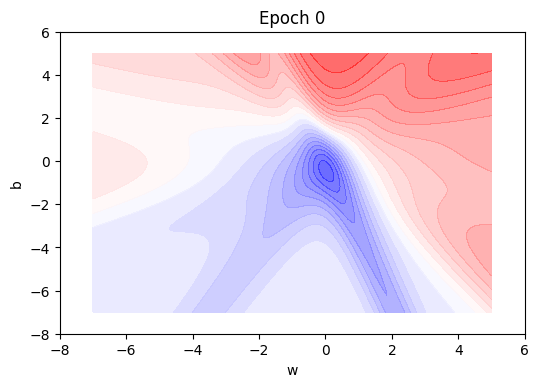

In [13]:
# first, plot the loss function - contour

# input meshgrid to plot the function
Wax = np.linspace(w_min, w_max, 256)
Bax = np.linspace(b_min, b_max, 256)
WW_grid, BB_grid = np.meshgrid(Wax, Bax)
# ouput to the grid input
Z2 = ssn.error(X, Y, WW_grid, BB_grid)

# figure, axis handlers for 2d plot(contour)
fig_2d = plt.figure(dpi=100)
ax_2d = plt.subplot(111)

cset = ax_2d.contourf(WW_grid, BB_grid, Z2, 25, alpha=0.6, cmap=cm.bwr)

ax_2d.set_xlabel("w")
ax_2d.set_xlim(w_min - 1, w_max + 1)
ax_2d.set_ylabel("b")
ax_2d.set_ylim(b_min - 1, b_max + 1)
title_2d = ax_2d.set_title("Epoch 0") # title handler in 2d plot



plt.show()    

In [14]:
# now, animate parameters-changing 
# on top of the loss function contour plot

# functions for animation

def plot_param_2d(i):
    e = int(i * (epochs / total_frames)) # which epoch
    line_2d.set_data(ssn.W_h[: e + 1], ssn.B_h[: e + 1])
    title_2d.set_text("Epoch: {: d}, Error: {:.4f}".format(e, ssn.E_h[i]))
    return line_2d, title_2d

In [16]:
i = 0 # frame index

# plot first value from history list. return plot-data-handler
(line_2d,) = ax_2d.plot(ssn.W_h[: 1], ssn.B_h[: 1], color="black", marker=".")
# line handler in 2d plot

anim = animation.FuncAnimation(fig_2d, func=plot_param_2d, frames=total_frames)
rc("animation", html="jshtml")



# printing details

if algo == "GD":
    print("algo = {}, eta = {}".format(algo, eta))
elif algo == "Momentum" or algo == "NAG":
    print("algo = {}, eta = {}, gamma = {}".format(algo, eta, gamma))
elif algo == "MiniBatch":
    print("algo = {}, eta = {}, batch size = {}".format(algo, eta, mini_batch_size)) 
elif algo == "AdaGrad" or algo == "RMSProp":
    print("algo = {}, eta = {}, eps = {}".format(algo, eta, eps))


anim